MAC 5768 - Visão e Processamento de Imagens

Segundo Semestre - 2020

Equipe:

    Ciro B Rosa - ciro.rosa@alumni.usp.br
    Josilton Sousa - josilton.sousa@gmail.com

Projeto de elaboração de tarefas do curso de Visão e Processamento de Imagens.


Fase 3 - Parte 1 - Entrega em 19/01/2021

Objetivos:
* Geração de arquivo "thresholdManual" contendo pelo menos 15% * 1080 = 162 fotos segmentadas manualmente (Ground Truth) a partir do "originalGrayDataset".
* Geração de arquivo contendo todas as fotos do "originalGrayDataset" segmentadas automaticamente. Para esta etapa, a equipe decidiu por utilizar dois algoritmos para segmentação automática, escolhidos empiricamente: Otsu e Yen. Desta forma, as pastas "thresholdOtsu" e "thresholdYen" serão geradas.


Segmentação Manual:

Uma quantidade equivalente a 15% das fotos contidas no dataset originalGrayDataset" foram segmentadas manualmente, utilizando-se para tal o software "Gimp". As fotos segmentadas manualmente (160 fotos) foram armazenadas no dataset "thresholdManual", junto com o respectivo arquivo de metadados.

Segmentação Automática - Escolha de algoritmo

O mesmo "originalGrayDataset" foi segmentado por dois métodos automáticos distintos, escolhidos de forma empírica a partir da demonstração a seguir. Com os resultados da demonstração, a equipe decidiu-se pelos algoritmos de "Otso" e Yen" conforme exposto mais abaixo.

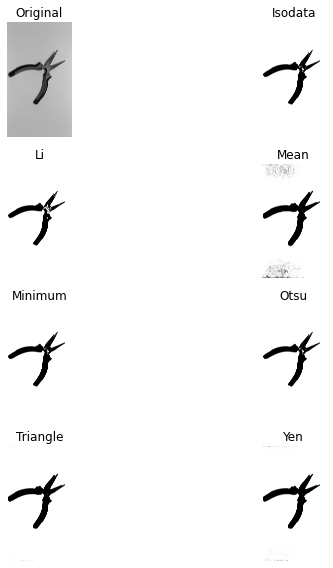

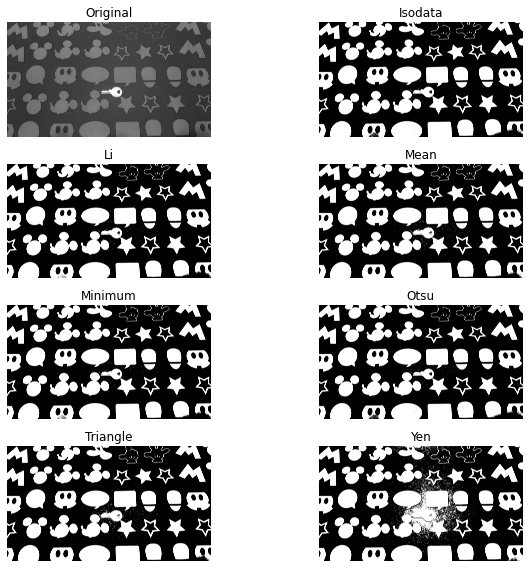

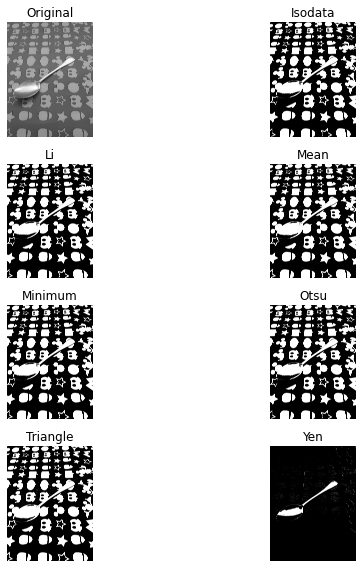

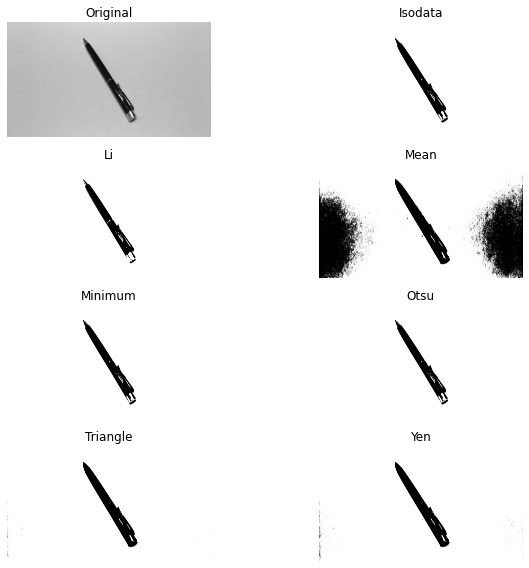

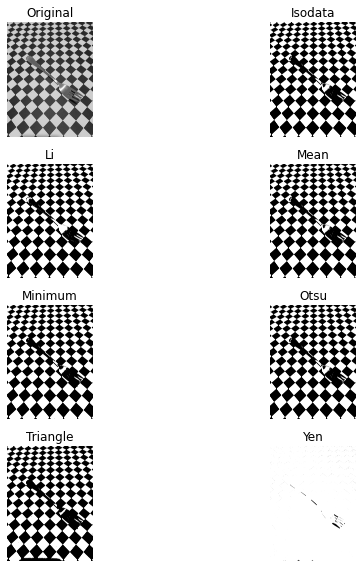

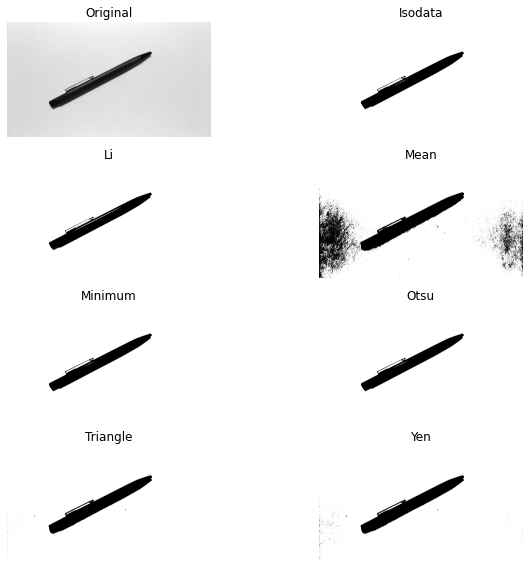

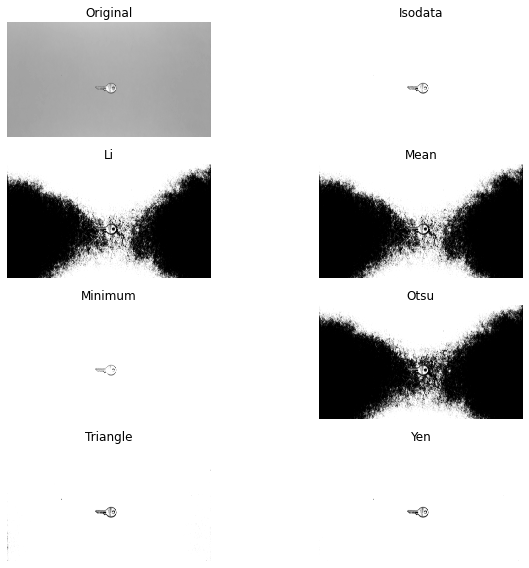

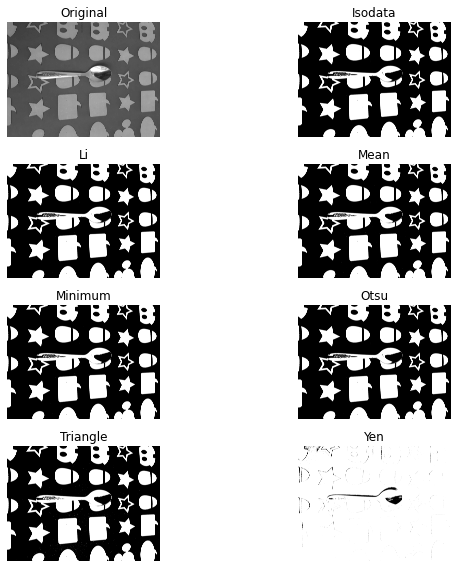

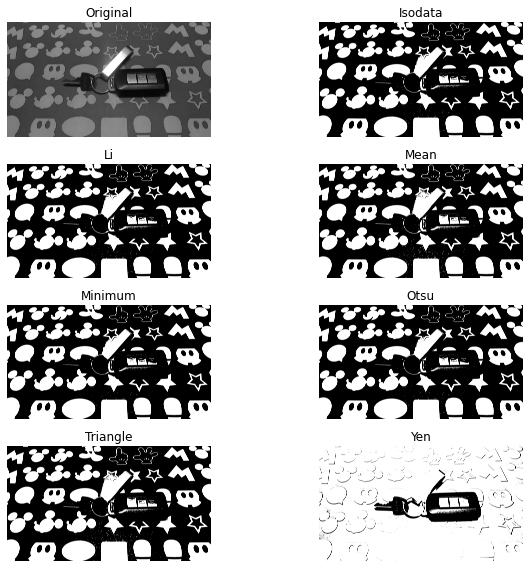

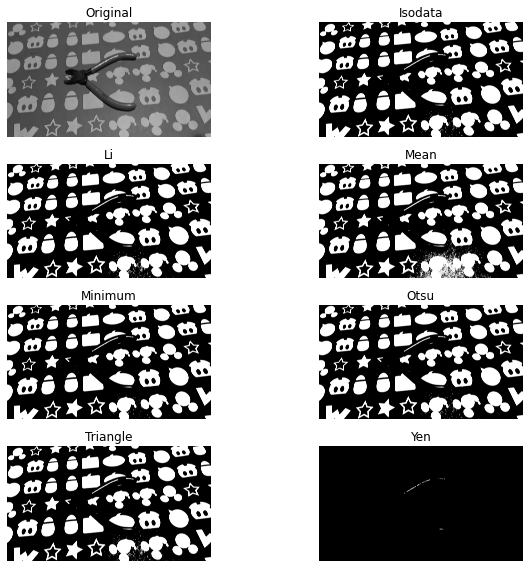

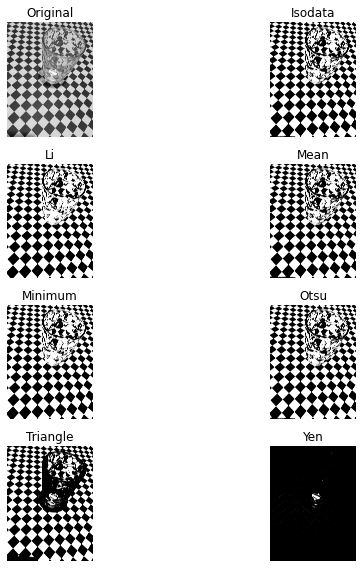

In [1]:
import os
from skimage import io
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt


# arquivo de entrada em cinza
pasta1 = "./originalGrayDataset/"
lista_fotos = os.listdir(pasta1)

i = 0
for foto in lista_fotos:
    fullname1 = pasta1 + foto
    img = io.imread(fullname1)
    fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
    plt.show()

    i += 1
    if i > 10:
        break


Segmentação Automática - Otsu e Yen

Escolhidos os algoritmos para segmentação automática, aplicam-se ambos ao "originalGrayDataset". São gerados dois novos datasets como resultado: "thresholdOtsu" e "thresholdYen".

In [2]:
import os
from skimage import io, img_as_ubyte
from skimage.filters import threshold_otsu, threshold_yen
import matplotlib.pyplot as plt
import pandas as pd

# extrair sufixo do arquivo
def sufixo(arq):
    suf = arq[-4:]
    return suf

# arquivo de entrada em cinza
pasta1 = "./originalGrayDataset/"
lista_fotos = os.listdir(pasta1)

# ler metadados em cinza
metafile1 = "grade.csv"
filename1 = pasta1 + metafile1
df1 = pd.read_csv(filename1, sep=";")
print(df1.head(5), "\n")

# arquivos de saída de fotos após threshold
pasta2 = "./thresholdOtsu/"
pasta3 = "./thresholdYen/"

for foto in lista_fotos:
    if sufixo(foto) != ".jpg":
        continue

    fullname1 = pasta1 + foto
    img = io.imread(fullname1)
    
    # threshold Otsu
    thresh2 = threshold_otsu(img)
    binary2 = img > thresh2
    binary2 = img_as_ubyte(binary2)

    # threshold Yen    
    thresh3 = threshold_yen(img)
    binary3 = img > thresh3
    binary3 = img_as_ubyte(binary3)
    
    """
    # plotagem de fotos "mnist-like"
    plt.close("all")
    f, ax = plt.subplots(1, 3, figsize=(10, 10))

    ax[0].set_title("originalGrayDataset")
    ax[0].set(xticks=[], yticks=[])
    ax[0].imshow(img, cmap=plt.cm.gray)

    ax[1].set_title("thresholdOtsu")
    ax[1].set(xticks=[], yticks=[])
    ax[1].imshow(binary2, cmap=plt.cm.gray)
    
    ax[2].set_title("thresholdYen")
    ax[2].set(xticks=[], yticks=[])
    ax[2].imshow(binary3, cmap=plt.cm.gray)
    
    plt.tight_layout()
    io.show()
    """
    # gravação das imagens
    f2 = pasta2 + foto
    io.imsave(f2, binary2)
    
    f3 = pasta3 + foto
    io.imsave(f3, binary3)
    #break

# gravar metadados
df2 = df1
df2.transformacao = "seg otsu"
metafile2 = metafile1
filename2 = pasta2 + metafile2
df2.to_csv(filename2, 
           index = False, 
           header=True, 
           sep=";")
print(df2.head(5), "\n")

df3 = df1
df3.transformacao = "seg yen"
metafile3 = metafile1
filename3 = pasta3 + metafile3
df3.to_csv(filename3, 
           index = False, 
           header=True, 
           sep=";")
print(df3.head(5), "\n")


   sequencia objeto tipo_obj   fundo  iluminacao transformacao responsavel  \
0          1  garfo        a  branco  indoor dia         cinza    Josilton   
1          2  garfo        a  branco  indoor dia         cinza    Josilton   
2          3  garfo        a  branco  indoor dia         cinza    Josilton   
3          1   faca        a  branco  indoor dia         cinza    Josilton   
4          2   faca        a  branco  indoor dia         cinza    Josilton   

    arquivo  
0  1081.jpg  
1  1082.jpg  
2  1083.jpg  
3  1084.jpg  
4  1085.jpg   



<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1802.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1100.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/2057.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1811.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/2137.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1151.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/2072.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1966.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:6

<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1801.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1930.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/2121.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1281.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1797.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1988.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1124.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1173.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:6

<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1862.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1782.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/2038.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1210.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1789.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1311.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1182.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/2147.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:6

<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1267.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:65: UserWarning: ./thresholdOtsu/1640.jpg is a low contrast image
  io.imsave(f2, binary2)
<ipython-input-2-25f15d1fa56c>:65: UserWarning: ./thresholdOtsu/1101.jpg is a low contrast image
  io.imsave(f2, binary2)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1101.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1282.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/2126.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1280.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1499.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>

<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/1284.jpg is a low contrast image
  io.imsave(f3, binary3)
<ipython-input-2-25f15d1fa56c>:68: UserWarning: ./thresholdYen/2098.jpg is a low contrast image
  io.imsave(f3, binary3)


   sequencia objeto tipo_obj   fundo  iluminacao transformacao responsavel  \
0          1  garfo        a  branco  indoor dia      seg otsu    Josilton   
1          2  garfo        a  branco  indoor dia      seg otsu    Josilton   
2          3  garfo        a  branco  indoor dia      seg otsu    Josilton   
3          1   faca        a  branco  indoor dia      seg otsu    Josilton   
4          2   faca        a  branco  indoor dia      seg otsu    Josilton   

    arquivo  
0  1081.jpg  
1  1082.jpg  
2  1083.jpg  
3  1084.jpg  
4  1085.jpg   

   sequencia objeto tipo_obj   fundo  iluminacao transformacao responsavel  \
0          1  garfo        a  branco  indoor dia       seg yen    Josilton   
1          2  garfo        a  branco  indoor dia       seg yen    Josilton   
2          3  garfo        a  branco  indoor dia       seg yen    Josilton   
3          1   faca        a  branco  indoor dia       seg yen    Josilton   
4          2   faca        a  branco  indoor dia       

Extraindo ROI - Groud Truth:

O código a seguir extrai a ROI do dataset "thresholdManual", anteriormente gerado com o software "Gimp", e copia a região correspondente ao Feret Box relevante, identificado em cada foto, no dataset "bboxManual". Este dataset guarda, portanto, as regiões de interesse consideradas como "Ground Truth".


   sequencia   objeto tipo_obj   fundo  iluminacao transformacao responsavel  \
0          3  alicate        a  branco  indoor dia    seg manual        Ciro   
1          3    chave        a  branco  indoor dia    seg manual        Ciro   
2          3   caneta        a  branco  indoor dia    seg manual        Ciro   
3          3    livro        a  branco  indoor dia    seg manual        Ciro   
4          3  caderno        a  branco  indoor dia    seg manual        Ciro   

    arquivo  
0  1098.jpg  
1  1101.jpg  
2  1104.jpg  
3  1107.jpg  
4  1110.jpg   



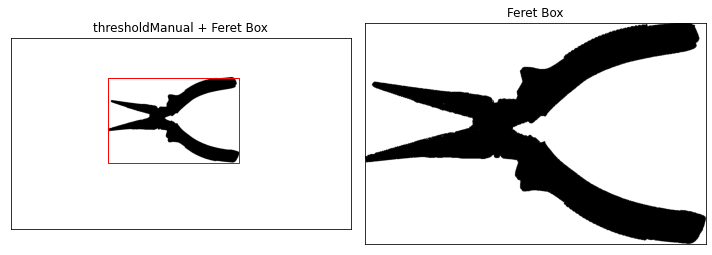

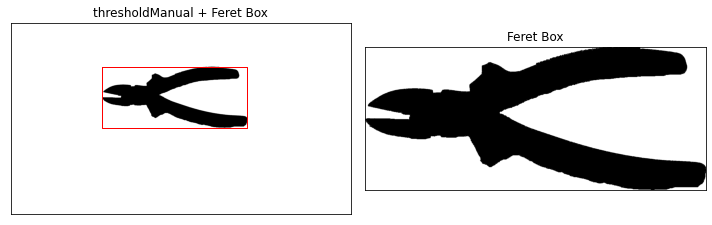

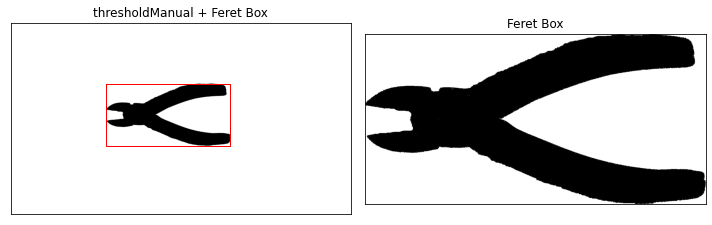

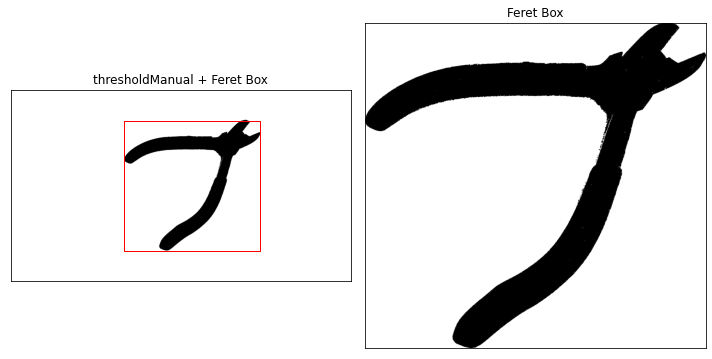

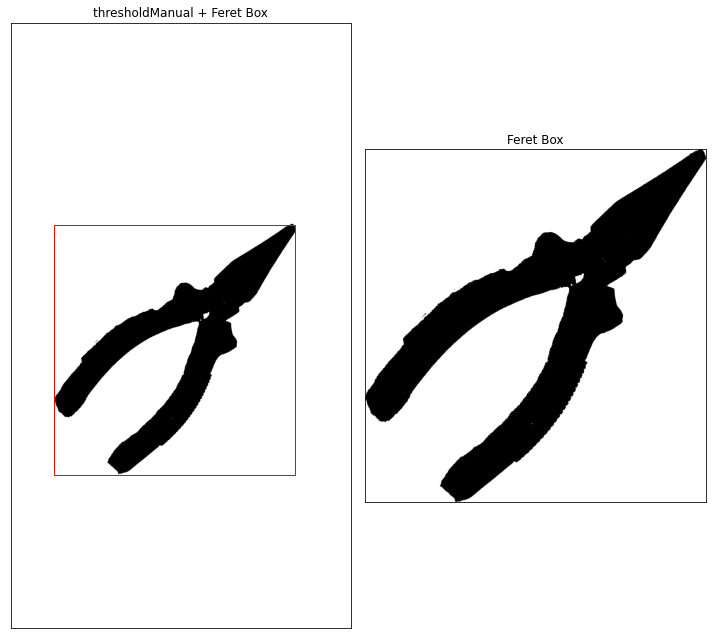

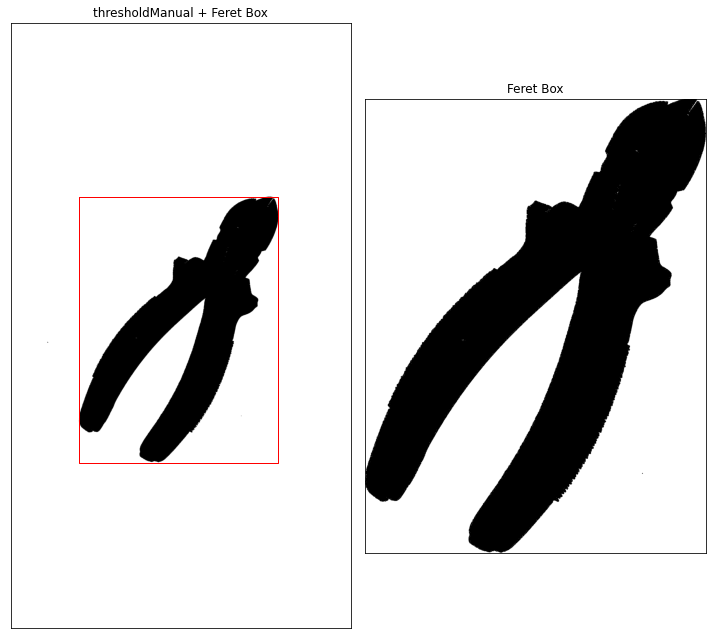

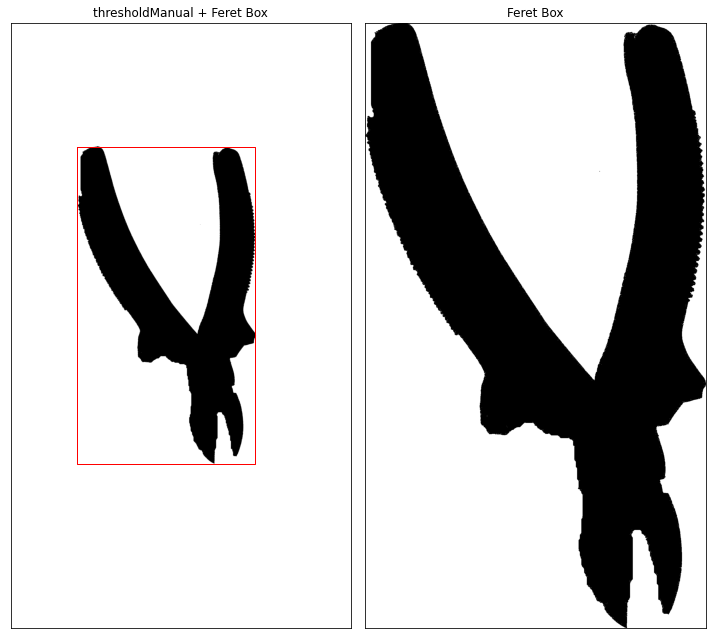

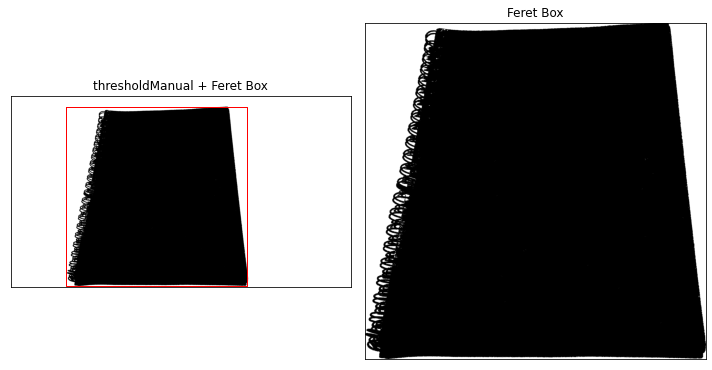

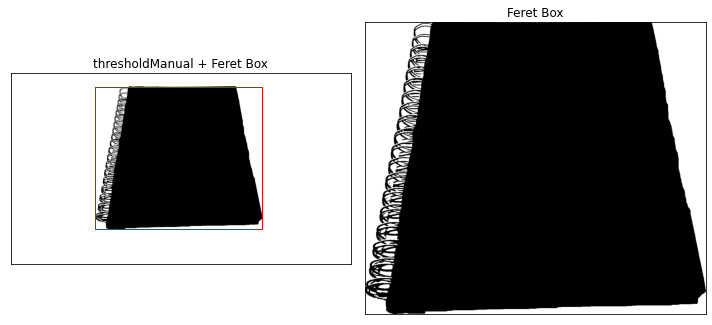

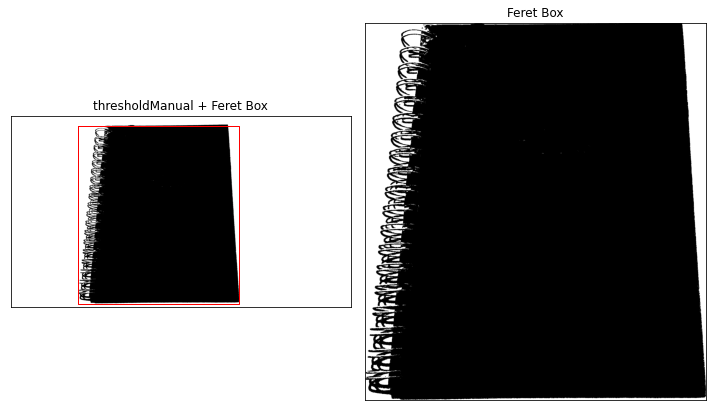

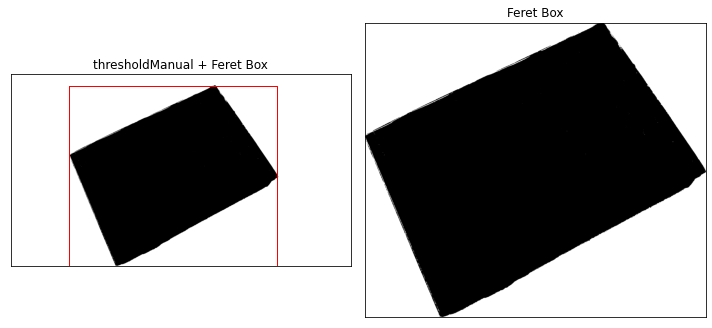

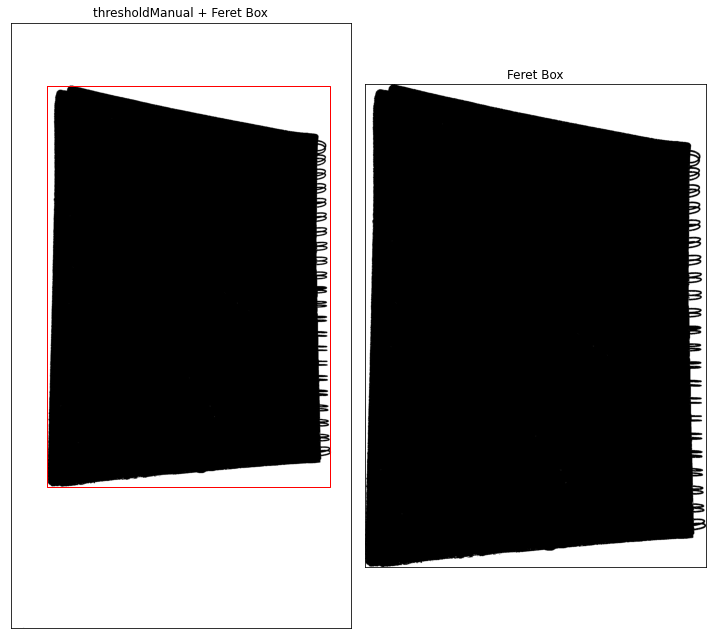

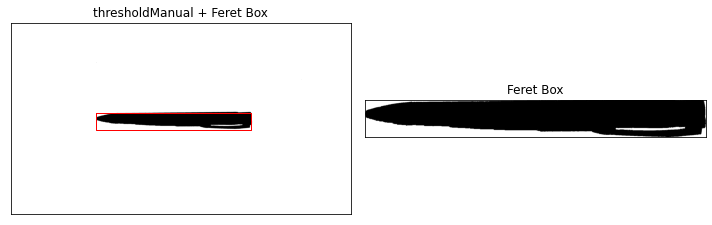

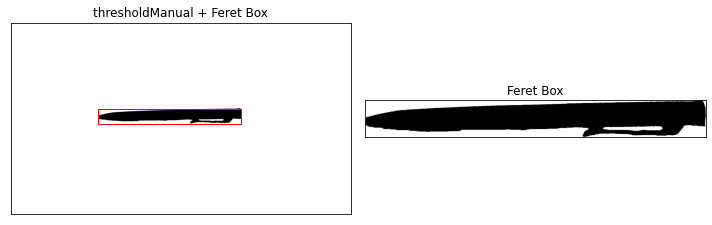

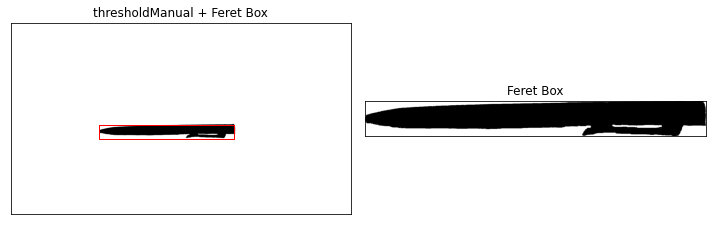

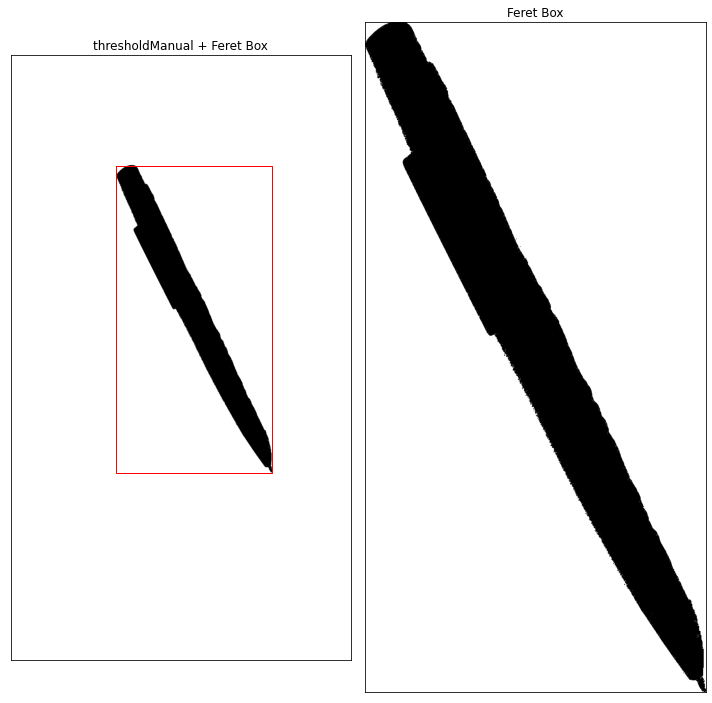

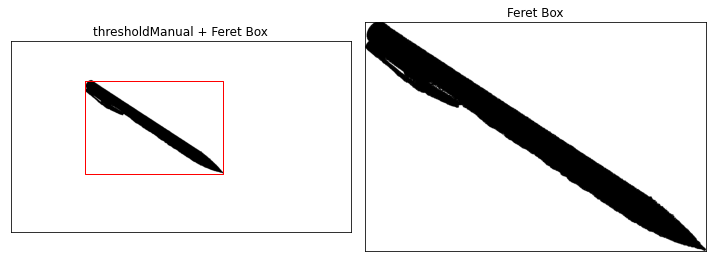

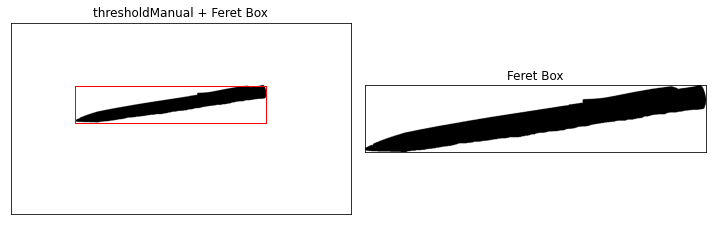

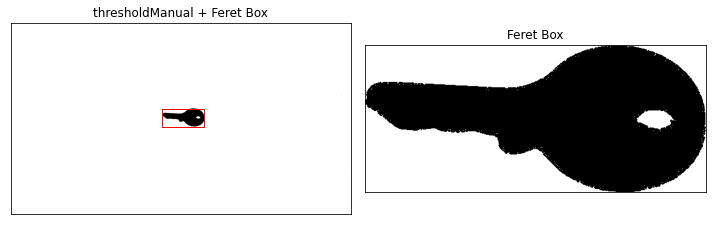

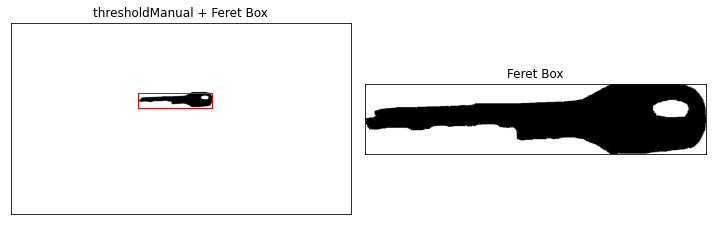

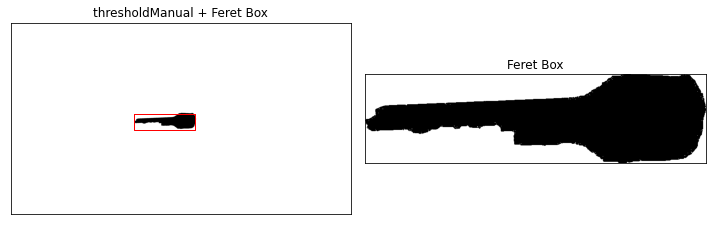

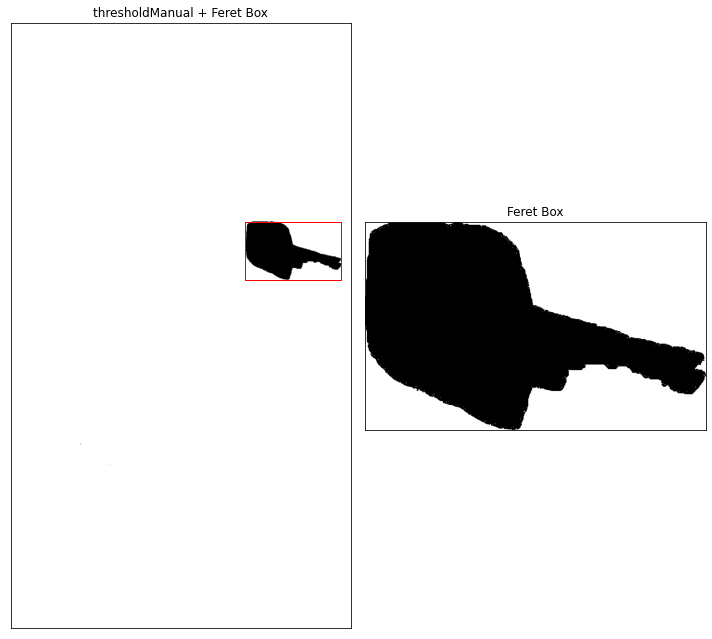

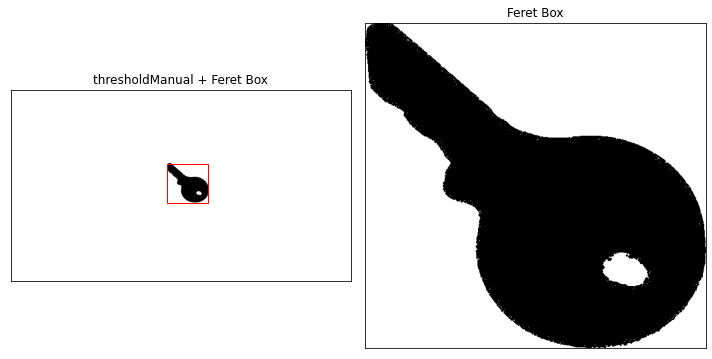

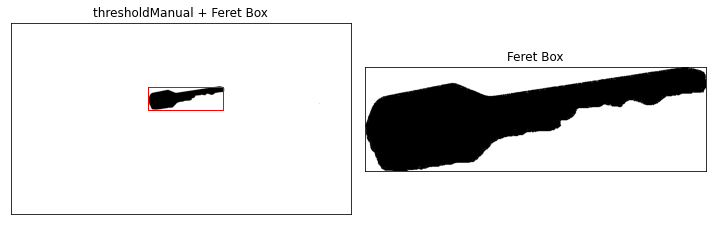

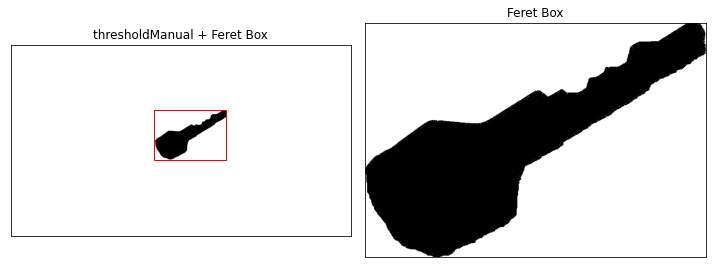

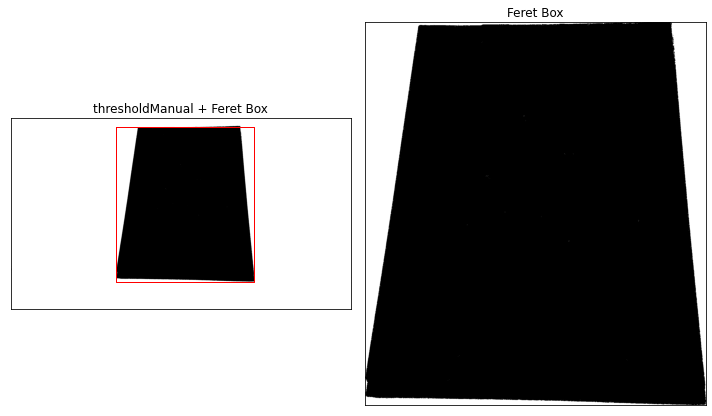

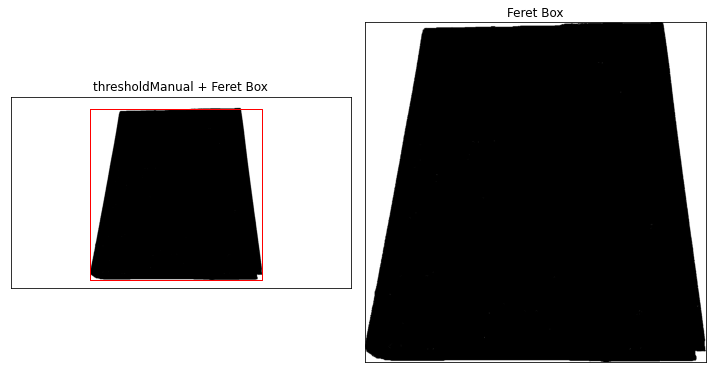

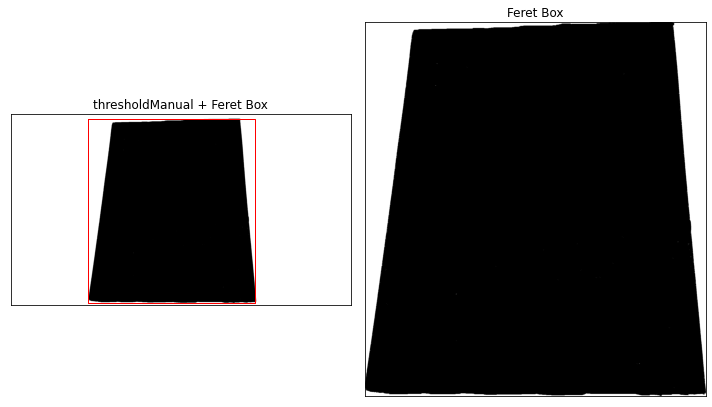

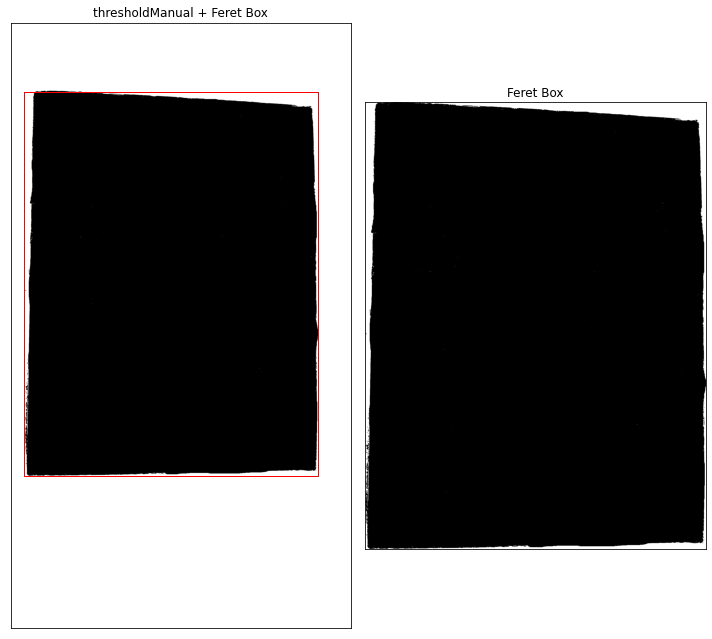

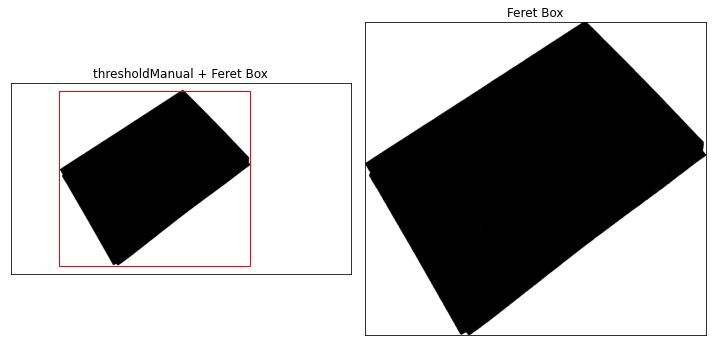

   sequencia   objeto tipo_obj   fundo  iluminacao transformacao responsavel  \
0          3  alicate        a  branco  indoor dia   bbox manual        Ciro   
1          3    chave        a  branco  indoor dia   bbox manual        Ciro   
2          3   caneta        a  branco  indoor dia   bbox manual        Ciro   
3          3    livro        a  branco  indoor dia   bbox manual        Ciro   
4          3  caderno        a  branco  indoor dia   bbox manual        Ciro   

    arquivo  
0  1098.jpg  
1  1101.jpg  
2  1104.jpg  
3  1107.jpg  
4  1110.jpg   



In [2]:
import pandas as pd
from skimage import io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.morphology import binary_erosion, binary_dilation

# adequação do nome de arquivo nos metadados
def fix_jpeg_name(arq):
    arq2 = int(arq[:-4])
    arq2 = str(arq2) + ".jpg"
    return arq2

# ler metadados segmentação manual
pasta1 = "./thresholdManual/"
metafile1 = "grade.csv"
filename1 = pasta1 + metafile1
df1 = pd.read_csv(filename1, sep=",")
print(df1.head(5), "\n")

# pasta de gravação de fotos bbox
pasta2 = "./bboxManual/"

# identificar classes contidas no arquivo
classes = df1["objeto"].unique()
classes.sort()

#ler imagens por classes
for classe in classes:
    # selecionar registros correspondentes a classe de objeto
    filtro = (df1.objeto == classe)
    df_temp = df1[filtro]
    lista_fotos = df_temp["arquivo"]

    # processar fotos correspondentes a cada classe
    for foto in lista_fotos:
        foto = fix_jpeg_name(foto)
        fullname = pasta1 + foto
        img = io.imread(fullname)
    
        # processamento/melhoria da segmentação
        img_dilat   = binary_dilation(img)
        img_erosion = binary_erosion(img_dilat)
        
        # imagem final para label
        img2 = img_erosion
    
        # label image regions
        img_label = label(img2, background=1)   # background=1 (fundo branco)
        regions = regionprops(img_label)
    
        # plotagem de fotos identificadas
        plt.close("all")
        f, ax = plt.subplots(1, 2, figsize=(10, 10))
        ax[0].imshow(img2, cmap=plt.cm.gray)
        ax[0].set(xticks=[], yticks=[])
        ax[0].set_title("thresholdManual + Feret Box")

        # gerar e plotar feret boxes
        for r in regions:
            if r.area <= 2000:                  # filtro de pequenos artefatos
                continue
    
            minr, minc, maxr, maxc = r.bbox
            bx = (minc, maxc, maxc, minc, minc)
            by = (minr, minr, maxr, maxr, minr)
            ax[0].plot(bx, by, '-r', linewidth=1.0)
        
        # gerar sub-imagem dentro do feret box
        img2sub = img2[minr:maxr, minc:maxc]
        img2sub = img_as_ubyte(img2sub)

        ax[1].imshow(img2sub, cmap=plt.cm.gray)
        ax[1].set(xticks=[], yticks=[])
        ax[1].set_title("Feret Box")
    
        # mostrar imagens
        plt.tight_layout()
        io.show()
        
        # gravação das imagens
        f2 = pasta2 + foto
        io.imsave(f2, img2sub)

# gravar metadados
metafile2 = metafile1
df2 = df1
df2.transformacao = "bbox manual"
filename2 = pasta2 + metafile2
df2.to_csv(filename2, 
           index = False, 
           header=True, 
           sep=";")
print(df2.head(5), "\n")
